In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [104]:
from tensorflow.keras.layers import Normalization , InputLayer , Dense
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [105]:
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [106]:
data.shape

(1000, 12)

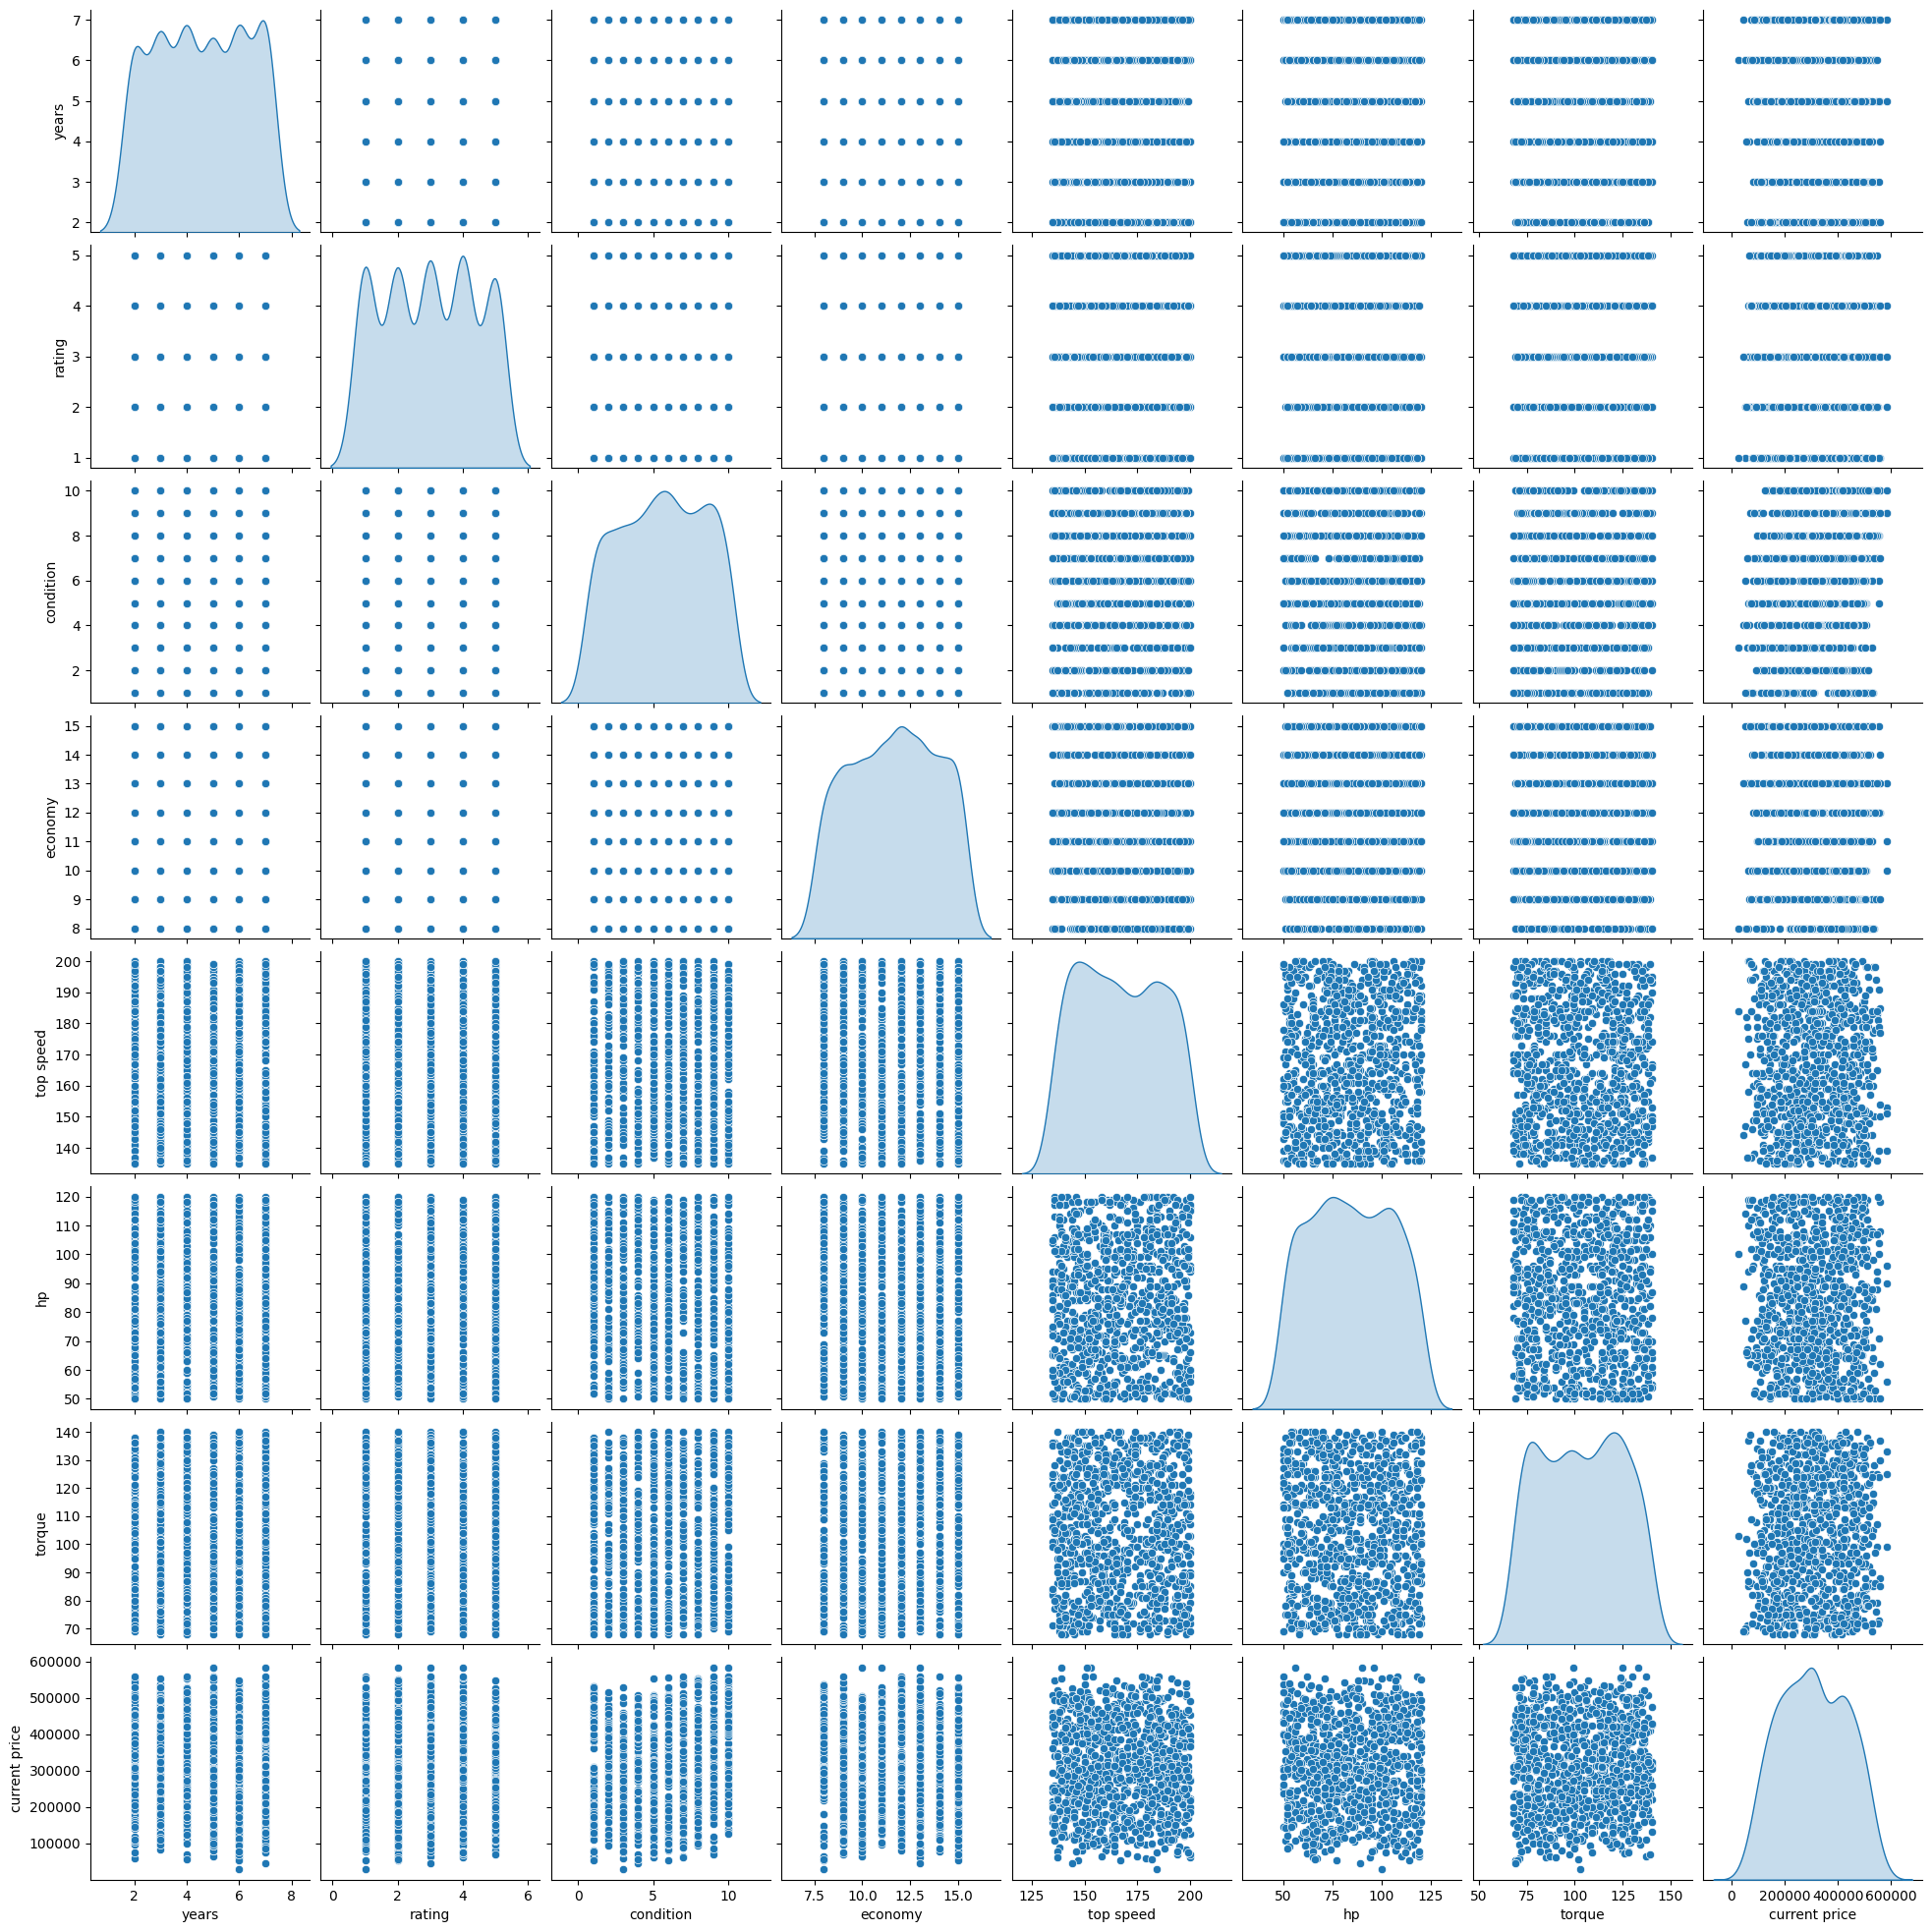

In [107]:
sns.pairplot(data[['years','rating','condition','economy','top speed' , 'hp' , 'torque' , 'current price']], diag_kind='kde')

In [108]:
tensordata = tf.constant(data)
tensordata = tf.cast(tensordata,tf.float32)
print(tensordata)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [109]:
tf_data = tf.random.shuffle(tensordata)
print(tf_data[:5])

tf.Tensor(
[[2.400000e+02 6.636510e+05 8.345850e+05 7.000000e+00 6.497300e+04
  4.000000e+00 7.000000e+00 1.000000e+01 1.860000e+02 1.130000e+02
  1.260000e+02 4.900005e+05]
 [6.270000e+02 6.966540e+05 7.602960e+05 2.000000e+00 5.908000e+04
  2.000000e+00 1.000000e+01 9.000000e+00 1.940000e+02 8.100000e+01
  7.600000e+01 5.423710e+05]
 [7.400000e+01 5.575370e+05 8.072220e+05 4.000000e+00 5.071400e+04
  1.000000e+00 1.000000e+01 1.500000e+01 1.780000e+02 8.500000e+01
  1.250000e+02 5.293185e+05]
 [5.510000e+02 6.387140e+05 7.502360e+05 3.000000e+00 6.996500e+04
  1.000000e+00 4.000000e+00 8.000000e+00 1.440000e+02 1.180000e+02
  1.250000e+02 4.152315e+05]
 [5.330000e+02 6.684270e+05 8.117660e+05 3.000000e+00 6.017600e+04
  4.000000e+00 8.000000e+00 1.500000e+01 1.510000e+02 8.700000e+01
  1.350000e+02 5.164660e+05]], shape=(5, 12), dtype=float32)


In [110]:
X = tf_data[:,3:-1]
X= tf.expand_dims(X,axis=1)
Y = tf_data[:,-1]
Y = tf.expand_dims(Y,axis=1)
print(X[:5])

tf.Tensor(
[[[7.0000e+00 6.4973e+04 4.0000e+00 7.0000e+00 1.0000e+01 1.8600e+02
   1.1300e+02 1.2600e+02]]

 [[2.0000e+00 5.9080e+04 2.0000e+00 1.0000e+01 9.0000e+00 1.9400e+02
   8.1000e+01 7.6000e+01]]

 [[4.0000e+00 5.0714e+04 1.0000e+00 1.0000e+01 1.5000e+01 1.7800e+02
   8.5000e+01 1.2500e+02]]

 [[3.0000e+00 6.9965e+04 1.0000e+00 4.0000e+00 8.0000e+00 1.4400e+02
   1.1800e+02 1.2500e+02]]

 [[3.0000e+00 6.0176e+04 4.0000e+00 8.0000e+00 1.5000e+01 1.5100e+02
   8.7000e+01 1.3500e+02]]], shape=(5, 1, 8), dtype=float32)


In [111]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [112]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
Y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
Y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]


print(X_val.shape)
print(Y_val.shape)

(100, 1, 8)
(100, 1)


In [113]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 1, 8), dtype=float32, numpy=
array([[[ 1.4160079 , -1.2071284 ,  0.7561922 ,  0.50649244,
         -0.71860933,  1.006477  ,  1.40032   ,  1.0805213 ]],

       [[-1.5081179 , -1.4083446 , -0.6722702 ,  1.5662848 ,
         -1.1716332 ,  1.4207717 , -0.17203815, -1.2975174 ]],

       [[-0.33846763, -1.6940014 , -1.3865013 ,  1.5662848 ,
          1.5465103 ,  0.59218234,  0.02450662,  1.0329605 ]],

       [[-0.9232928 , -1.0366766 , -1.3865013 , -0.55329984,
         -1.6246573 , -1.16857   ,  1.646001  ,  1.0329605 ]],

       [[-0.9232928 , -1.3709217 ,  0.7561922 ,  0.8597566 ,
          1.5465103 , -0.8060622 ,  0.122779  ,  1.5085683 ]]],
      dtype=float32)>

In [114]:
print(X[:5])

tf.Tensor(
[[[7.0000e+00 6.4973e+04 4.0000e+00 7.0000e+00 1.0000e+01 1.8600e+02
   1.1300e+02 1.2600e+02]]

 [[2.0000e+00 5.9080e+04 2.0000e+00 1.0000e+01 9.0000e+00 1.9400e+02
   8.1000e+01 7.6000e+01]]

 [[4.0000e+00 5.0714e+04 1.0000e+00 1.0000e+01 1.5000e+01 1.7800e+02
   8.5000e+01 1.2500e+02]]

 [[3.0000e+00 6.9965e+04 1.0000e+00 4.0000e+00 8.0000e+00 1.4400e+02
   1.1800e+02 1.2500e+02]]

 [[3.0000e+00 6.0176e+04 4.0000e+00 8.0000e+00 1.5000e+01 1.5100e+02
   8.7000e+01 1.3500e+02]]], shape=(5, 1, 8), dtype=float32)


In [115]:
model = tf.keras.Sequential([
    InputLayer(shape=(8,)),
    normalizer,
    Dense(128,activation = "relu"),
    Dense(128,activation = "relu"),
    Dense(128,activation = "relu"),
    Dense(1)
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_8 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [116]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()]
              )

In [117]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

print(train_dataset)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(1, 8), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))>


In [118]:
tf.config.run_functions_eagerly(True)

In [119]:
history = model.fit(x=train_dataset,validation_data=val_dataset , epochs = 10,verbose=1)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - loss: 142945.6562 - root_mean_squared_error: 185205.3594 - val_loss: 51740.3594 - val_root_mean_squared_error: 63402.7930
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 70559.5859 - root_mean_squared_error: 90310.1328 - val_loss: 44866.1445 - val_root_mean_squared_error: 56730.3984
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - loss: 48033.6875 - root_mean_squared_error: 61619.4844 - val_loss: 71813.3125 - val_root_mean_squared_error: 86965.0156
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 47432.6836 - root_mean_squared_error: 59489.3984 - val_loss: 56897.3945 - val_root_mean_squared_error: 68341.1172
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 47533.6680 - root_mean_squared_error: 60587.3477 - val_loss: 52495.4648 - val_root_mean_squared_error: 65194.5234
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - loss: 46716.1445 - root_mean_squared_error: 58609.8359 - val_l